In [53]:
from os import listdir
from os.path import join
import random
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.transforms.functional import to_pil_image

import os
import time

import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from networks.models import *
from dataset.datasets import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
path2models = 'D:/Pix2Pix/models/'
epoch=790
path2weights_gen = os.path.join(path2models, f'weights_gen_epoch({epoch}).pt')
path2weights_dis = os.path.join(path2models, f'weights_dis_epoch({epoch}).pt')

In [54]:
# 가중치 불러오기
model_gen = GeneratorUNet().to(device)
weights = torch.load(path2weights_gen)
model_gen.load_state_dict(weights)

<All keys matched successfully>

In [55]:
path2img = './dataset/comics/'

# transforms 정의
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
                    transforms.CenterCrop((690, 690)),
                    transforms.Resize((256,256))
])

test_ds = ImageDataset(path2img, mode='test', transform=transform)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True)

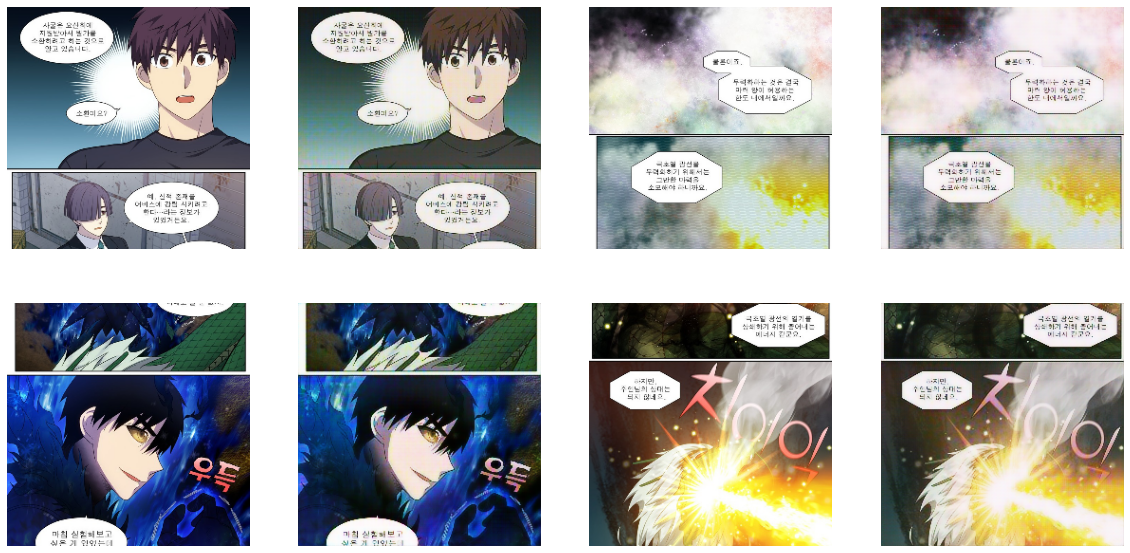

In [62]:
# evaluation model
model_gen.eval()

# 가짜 이미지 생성
with torch.no_grad():
    for a,b in test_dl:
        fake_imgs = model_gen(a.to(device)).detach().cpu()
        real_imgs = b
        break

# 가짜 이미지 시각화
plt.figure(figsize=(20,10))

for ii in range(0,8,2):
    plt.subplot(2,4,ii+1)
    plt.imshow(to_pil_image(0.5*real_imgs[ii]+0.5))
    plt.axis('off')
    plt.subplot(2,4,ii+2)
    plt.imshow(to_pil_image(0.5*fake_imgs[ii]+0.5))
    plt.axis('off')